# **Lending Club - Case Study**
### Group Facilitator: Raghav Mishra
### Group Member:  Gayathri Perumal 

#### **EDA of Lending Club**

### Problem Statement (Business Definition)
When the company receives a loan application, the company has to make a decision for loan approval based on the applicant’s profile. Two **types of risks** are associated with the bank’s decision::


*   If the applicant is **likely to repay the loan**, then not approving the loan results in a **loss of business** to the company
*   If the applicant is **not likely to repay the loan**, he/she is likely to **default**, then approving the loan may lead to a **financial loss** for the company

In [31]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

Load the data

In [32]:
 # Load the dataset into a dataframe df_loan and set low_memory to False to avoid warning messages.
df_loan = pd.read_csv('loan.csv', low_memory = False)
df_loan.head()

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,url,desc,purpose,title,zip_code,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,next_pymnt_d,last_credit_pull_d,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,application_type,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
0,1077501,1296599,5000,5000,4975.0,36 months,10.65%,162.87,B,B2,NaN,10+ years,RENT,24000.0,Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I need to upgra...,credit_card,Computer,860xx,AZ,27.65,0,Jan-85,1,NaN,NaN,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,Jan-15,171.62,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
1,1077430,1314167,2500,2500,2500.0,60 months,15.27%,59.83,C,C4,Ryder,< 1 year,RENT,30000.0,Source Verified,Dec-11,Charged Off,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/22/11 > I plan to use t...,car,bike,309xx,GA,1.00,0,Apr-99,5,NaN,NaN,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,Apr-13,119.66,NaN,Sep-13,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
2,1077175,1313524,2400,2400,2400.0,36 months,15.96%,84.33,C,C5,NaN,10+ years,RENT,12252.0,Not Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,NaN,small_business,real estate business,606xx,IL,8.72,0,Nov-01,2,NaN,NaN,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,Jun-14,649.91,NaN,May-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN
3,1076863,1277178,10000,10000,10000.0,36 months,13.49%,339.31,C,C1,AIR RESOURCES BOARD,10+ years,RENT,49200.0,Source Verified,Dec-11,Fully Paid,n,https://lendingclub.com/browse/loanDetail.acti...,Borrower added on 12/21/11 > to pay for prop...,other,personel,917xx,CA,20.00,0,Feb-96,1,35.0,NaN,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,Jan-15,357.48,NaN,Apr-16,0.0,NaN,1,INDIVIDUAL,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN

# Initial data exploration

* Display the number of rows and columns
* Display the column names
* Display the data types of each column
* Display the number of missing values in each column
* Display the number of duplicate rows
* Display the summary statistics of the dataset


In [33]:
# Initial data exploration
def explore_data(df):
    print("Dataset Shape:", df.shape) # Display the number of rows and columns
    print("\nColumns:", df.columns.tolist()) # Display the column names
    print("\nData Types:\n", df.dtypes) # Display the data types of each column
    print("\nMissing Values:\n", df.isnull().sum()) # Display the number of missing values in each column
    print("\nDuplicate Rows:", df.duplicated().sum()) # Display the number of duplicate rows
    return df.describe() # Display the summary statistics of the dataset

explore_data(df_loan) # Call the function to explore the data in the dataframe

Dataset Shape: (39717, 111)

Columns: ['id', 'member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'sub_grade', 'emp_title', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'url', 'desc', 'purpose', 'title', 'zip_code', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'next_pymnt_d', 'last_credit_pull_d', 'collections_12_mths_ex_med', 'mths_since_last_major_derog', 'policy_code', 'application_type', 'annual_inc_joint', 'dti_joint', 'verification_status_joint', 'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'open_acc_6m',

,id,member_id,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,mths_since_last_record,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_amnt,collections_12_mths_ex_med,mths_since_last_major_derog,policy_code,annual_inc_joint,dti_joint,verification_status_joint,acc_now_delinq,tot_coll_amt,tot_cur_bal,open_acc_6m,open_il_6m,open_il_12m,open_il_24m,mths_since_rcnt_il,total_bal_il,il_util,open_rv_12m,open_rv_24m,max_bal_bc,all_util,total_rev_hi_lim,inq_fi,total_cu_tl,inq_last_12m,acc_open_past_24mths,avg_cur_bal,bc_open_to_buy,bc_util,chargeoff_within_12_mths,delinq_amnt,mo_sin_old_il_acct,mo_sin_old_rev_tl_op,mo_sin_rcnt_rev_tl_op,mo_sin_rcnt_tl,mort_acc,mths_since_recent_bc,mths_since_recent_bc_dlq,mths_since_recent_inq,mths_since_recent_revol_delinq,num_accts_ever_120_pd,num_actv_bc_tl,num_actv_rev_tl,num_bc_sats,num_bc_tl,num_il_tl,num_op_rev_tl,num_rev_accts,num_rev_tl_bal_gt_0,num_sats,num_tl_120dpd_2m,num_tl_30dpd,num_tl_90g_dpd_24m,num_tl_op_past_12m,pct_tl_nvr_dlq,percent_bc_gt_75,pub_rec_bankruptcies,tax_liens,tot_hi_cred_lim,total_bal_ex_mort,total_bc_limit,total_il_high_credit_limit
count,3.971700e+04,3.971700e+04,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717.000000,39717.000000,39717.000000,14035.000000,2786.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39661.0,0.0,39717.0,0.0,0.0,0.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39661.0,39717.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,39020.000000,39678.0,0.0,0.0,0.0,0.0
mean,6.831319e+05,8.504636e+05,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,13.315130,0.146512,0.869200,35.900962,69.698134,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2678.826162,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.043260,0.0,NaN,NaN,NaN,NaN
std,2.106941e+05,2.656783e+05,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,6.678594,0.491812,1.070219,22.020060,43.822529,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,4447.136012,0.0,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.204324,0.0,NaN,NaN,NaN,NaN
min,5.473400e+04,7.069900e+04,500.000000,500.000000,0.000000,15.690000,4.000000e+03,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.000000,0.0,NaN,NaN,NaN,NaN
25%,5.162210e+05,6.667800e+05,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,8.170000,0.000000,0.000000,18.000000,22.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,218.680000,0.0,NaN,1.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,N

# Data Cleaning

In [34]:
# 1.  Drop columns with >50% missing
missing_pct = df_loan.isnull().mean()
cols_to_drop = missing_pct[missing_pct > 0.5].index
df_loan.drop(columns=cols_to_drop, inplace=True)

# 2. Drop irrelevant/redundant columns
redundant_cols = ['id', 'member_id', 'url', 'desc', 'zip_code', 
                    'title', 'sub_grade', 'emp_title','collections_12_mths_ex_med',
                    'collections_12_mths_ex_med','policy_code','acc_now_delinq','chargeoff_within_12_mths',
                    'delinq_amnt',	'pub_rec_bankruptcies',	'tax_liens']
df_loan.drop(columns=redundant_cols, inplace=True)

# 3. Fix date columns
date_cols = ['issue_d', 'earliest_cr_line', 'last_pymnt_d', 
            'next_pymnt_d', 'last_credit_pull_d']
for col in date_cols:
    if col in df_loan.columns:
        df_loan[col] = pd.to_datetime(df_loan[col], format='%b-%y', errors='coerce')





# Data after cleaning

In [35]:
# Call the function to explore the data after cleaning
explore_data(df_loan) 

Dataset Shape: (39717, 39)

Columns: ['loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term', 'int_rate', 'installment', 'grade', 'emp_length', 'home_ownership', 'annual_inc', 'verification_status', 'issue_d', 'loan_status', 'pymnt_plan', 'purpose', 'addr_state', 'dti', 'delinq_2yrs', 'earliest_cr_line', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util', 'total_acc', 'initial_list_status', 'out_prncp', 'out_prncp_inv', 'total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d', 'application_type']

Data Types:
 loan_amnt                           int64
funded_amnt                         int64
funded_amnt_inv                   float64
term                               object
int_rate                           object
installment                       float64
grade                              object
emp_length                         object
h

,loan_amnt,funded_amnt,funded_amnt_inv,installment,annual_inc,issue_d,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,total_acc,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d
count,39717.000000,39717.000000,39717.000000,39717.000000,3.971700e+04,39717,39717.000000,39717.000000,39717,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39717.000000,39646,39717.000000,39715
mean,11219.443815,10947.713196,10397.448868,324.561922,6.896893e+04,2010-11-03 23:26:45.166553344,13.315130,0.146512,1997-04-11 16:09:21.250849664,0.869200,9.294408,0.055065,13382.528086,22.088828,51.227887,50.989768,12153.596544,11567.149118,9793.348813,2263.663172,1.363015,95.221624,12.406112,2013-04-10 05:32:22.652474368,2678.826162,2014-09-07 19:16:08.007050496
min,500.000000,500.000000,0.000000,15.690000,4.000000e+03,2007-06-01 00:00:00,0.000000,0.000000,1969-02-01 00:00:00,0.000000,2.000000,0.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2008-01-01 00:00:00,0.000000,2007-05-01 00:00:00
25%,5500.000000,5400.000000,5000.000000,167.020000,4.040400e+04,2010-05-01 00:00:00,8.170000,0.000000,1993-12-01 00:00:00,0.000000,6.000000,0.000000,3703.000000,13.000000,0.000000,0.000000,5576.930000,5112.310000,4600.000000,662.180000,0.000000,0.000000,0.000000,2012-04-01 00:00:00,218.680000,2013-06-01 00:00:00
50%,10000.000000,9600.000000,8975.000000,280.220000,5.900000e+04,2011-02-01 00:00:00,13.400000,0.000000,1998-05-01 00:00:00,1.000000,9.000000,0.000000,8850.000000,20.000000,0.000000,0.000000,9899.640319,9287.150000,8000.000000,1348.910000,0.000000,0.000000,0.000000,2013-04-01 00:00:00,546.140000,2015-03-01 00:00:00
75%,15000.000000,15000.000000,14400.000000,430.780000,8.230000e+04,2011-08-01 00:00:00,18.600000,0.000000,2001-09-01 00:00:00,1.000000,12.000000,0.000000,17058.000000,29.000000,0.000000,0.000000,16534.433040,15798.810000,13653.260000,2833.400000,0.000000,0.000000,0.000000,2014-06-01 00:00:00,3293.160000,2016-05-01 00:00:00
max,35000.000000,35000.000000,35000.000000,1305.190000,6.000000e+06,2011-12-01 00:00:00,29.990000,11.000000,2068-12-01 00:00:00,8.000000,44.000000,4.000000,149588.000000,90.000000,6311.470000,6307.370000,58563.679930,58563.680000,35000.020000,23563.680000,180.200000,29623.350000,7002.190000,2016-05-01 00:00:00,36115.200000,2016-05-01 00:00:00
std,7456.670694,7187.238670,7128.450439,208.874874,6.379377e+04,NaN,6.678594,0.491812,NaN,1.070219,4.400282,0.237200,15885.016641,11.401709,375.172839,373.824457,9042.040766,8942.672613,7065.522127,2608.111964,7.289979,688.744771,148.671593,NaN,4447.136012,NaN


In [36]:
# Display the first 5 rows of the cleaned dataframe
df_loan.head()

,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,pymnt_plan,purpose,addr_state,dti,delinq_2yrs,earliest_cr_line,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,initial_list_status,out_prncp,out_prncp_inv,total_pymnt,total_pymnt_inv,total_rec_prncp,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,last_pymnt_d,last_pymnt_amnt,last_credit_pull_d,application_type
0,5000,5000,4975.0,36 months,10.65%,162.87,B,10+ years,RENT,24000.0,Verified,2011-12-01,Fully Paid,n,credit_card,AZ,27.65,0,1985-01-01,1,3,0,13648,83.70%,9,f,0.00,0.00,5863.155187,5833.84,5000.00,863.16,0.00,0.00,0.00,2015-01-01,171.62,2016-05-01,INDIVIDUAL
1,2500,2500,2500.0,60 months,15.27%,59.83,C,< 1 year,RENT,30000.0,Source Verified,2011-12-01,Charged Off,n,car,GA,1.00,0,1999-04-01,5,3,0,1687,9.40%,4,f,0.00,0.00,1008.710000,1008.71,456.46,435.17,0.00,117.08,1.11,2013-04-01,119.66,2013-09-01,INDIVIDUAL
2,2400,2400,2400.0,36 months,15.96%,84.33,C,10+ years,RENT,12252.0,Not Verified,2011-12-01,Fully Paid,n,small_business,IL,8.72,0,2001-11-01,2,2,0,2956,98.50%,10,f,0.00,0.00,3005.666844,3005.67,2400.00,605.67,0.00,0.00,0.00,2014-06-01,649.91,2016-05-01,INDIVIDUAL
3,10000,10000,10000.0,36 months,13.49%,339.31,C,10+ years,RENT,49200.0,Source Verified,2011-12-01,Fully Paid,n,other,CA,20.00,0,1996-02-01,1,10,0,5598,21%,37,f,0.00,0.00,12231.890000,12231.89,10000.00,2214.92,16.97,0.00,0.00,2015-01-01,357.48,2016-04-01,INDIVIDUAL
4,3000,3000,3000.0,60 months,12.69%,67.79,B,1 year,RENT,80000.0,Source Verified,2011-12-01,Current,n,other,OR,17.94,0,1996-01-01,0,15,0,27783,53.90%,38,f,524.06,524.06,3513.330000,3513.33,2475.94,1037.39,0.00,0.00,0.00,2016-05-01,67.79,2016-05-01,INDIVIDUAL


# Exploratory Data Analysis (EDA)

 # 1. Univariate Analysis
   * Distribution of Loan Amount Statistics
   * Distribution of Loan Status Statistics
   * Count of Loan Terms Statistics
   * Distribution of loan grades statistics
   * Distribution of Loan Applicants by Work Experience Statistics
   * Distribution of Loan Applicants by Home Ownership Statistics

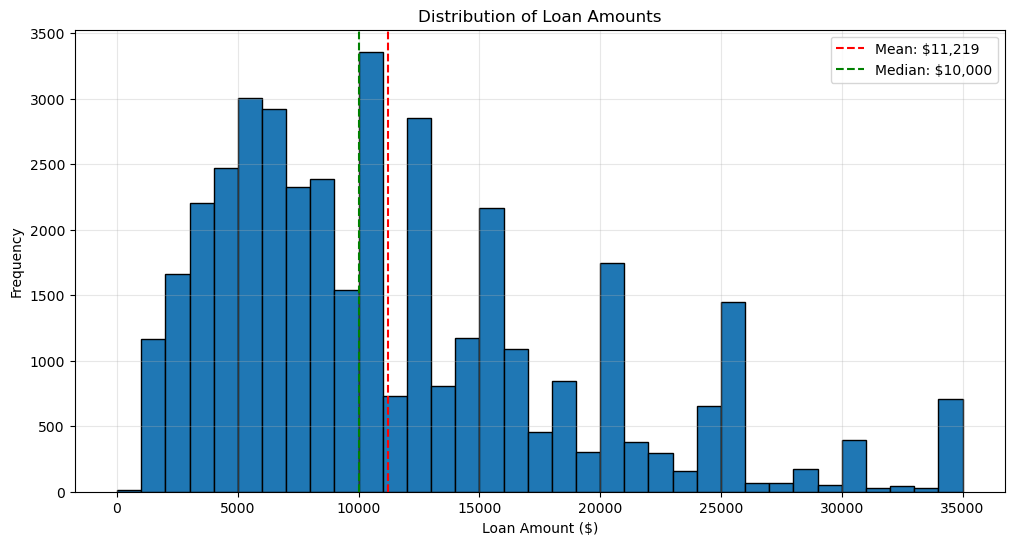

Distribution of Loan Amount Statistics:
Min: $500.00
Max: $35,000.00
Mean: $11,219.44
Median: $10,000.00

 Analysis shows that the loan amounts range from $500 to $35,000 with a mean of $11,219 and a median of $10,000.


In [37]:
# Distribution of Loan Amount Statistics:
"""
This script visualizes the distribution of loan amounts and provides summary statistics.
Steps:
1. Create loan amount bins ranging from 0 to the maximum loan amount in increments of 1000.
2. Plot a histogram of the loan amounts with the specified bins.
3. Add vertical lines to indicate the mean and median loan amounts.
4. Display the plot with a title, axis labels, legend, and grid.
5. Print summary statistics including the minimum, maximum, mean, and median loan amounts.

"""
# Create loan amount bins (0-35000 in 1000 increments)
bin_edges = np.arange(0, df_loan['loan_amnt'].max() + 1000, 1000)

# Plot histogram
plt.figure(figsize=(12, 6))
plt.hist(df_loan['loan_amnt'], bins=bin_edges, edgecolor='black')
plt.title('Distribution of Loan Amounts')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Frequency')

# Add mean and median lines
plt.axvline(df_loan['loan_amnt'].mean(), color='red', linestyle='dashed', label=f'Mean: ${df_loan["loan_amnt"].mean():,.0f}')
plt.axvline(df_loan['loan_amnt'].median(), color='green', linestyle='dashed', label=f'Median: ${df_loan["loan_amnt"].median():,.0f}')

plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Print summary statistics
print(f"Distribution of Loan Amount Statistics:")
print(f"Min: ${df_loan['loan_amnt'].min():,.2f}")
print(f"Max: ${df_loan['loan_amnt'].max():,.2f}")
print(f"Mean: ${df_loan['loan_amnt'].mean():,.2f}")
print(f"Median: ${df_loan['loan_amnt'].median():,.2f}")


# Summary statistics of loan amounts
print("\n Analysis shows that the loan amounts range from $500 to $35,000 with a mean of $11,219 and a median of $10,000.")

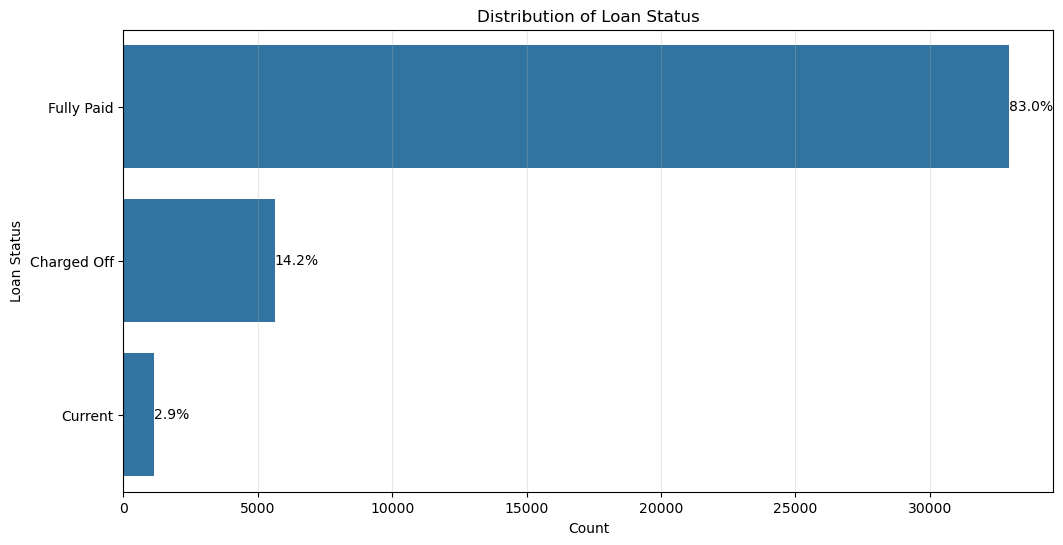


Distribution of Loan Status Statistics:
1. Fully Paid: 32,950 (82.96%)
2. Charged Off: 5,627 (14.17%)
3. Current: 1,140 (2.87%)

Analysis shows that the loan status  with 'Fully Paid' being the most common category (82.9%).


In [38]:
# Distribution of Loan Status Statistics
"""
This script visualizes the distribution of loan status and provides summary statistics.
Steps:
1. Create a count plot of the loan status categories.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan status category.

"""
# Plot count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, y='loan_status', order=df_loan['loan_status'].value_counts().index)
plt.title('Distribution of Loan Status')
#percentage of loan status
total = len(df_loan['loan_status'])
for i, count in enumerate(df_loan['loan_status'].value_counts()):
    pct = 100 * count / total
    plt.text(count, i, f'{pct:.1f}%', va='center')
plt.xlabel('Count')
plt.ylabel('Loan Status')
plt.grid(axis='x', alpha=0.3)
plt.show()


# Print summary statistics
status_counts = df_loan['loan_status'].value_counts()
status_percent = df_loan['loan_status'].value_counts(normalize=True) * 100
print(f"\nDistribution of Loan Status Statistics:")
for i, (count, percent) in enumerate(zip(status_counts, status_percent), 1):
    #add Loan status name to the count and percentage
    print(f"{i}. {status_counts.index[i-1]}: {count:,.0f} ({percent:.2f}%)")

# Summary statistics of loan status
print("\nAnalysis shows that the loan status  with 'Fully Paid' being the most common category (82.9%).")


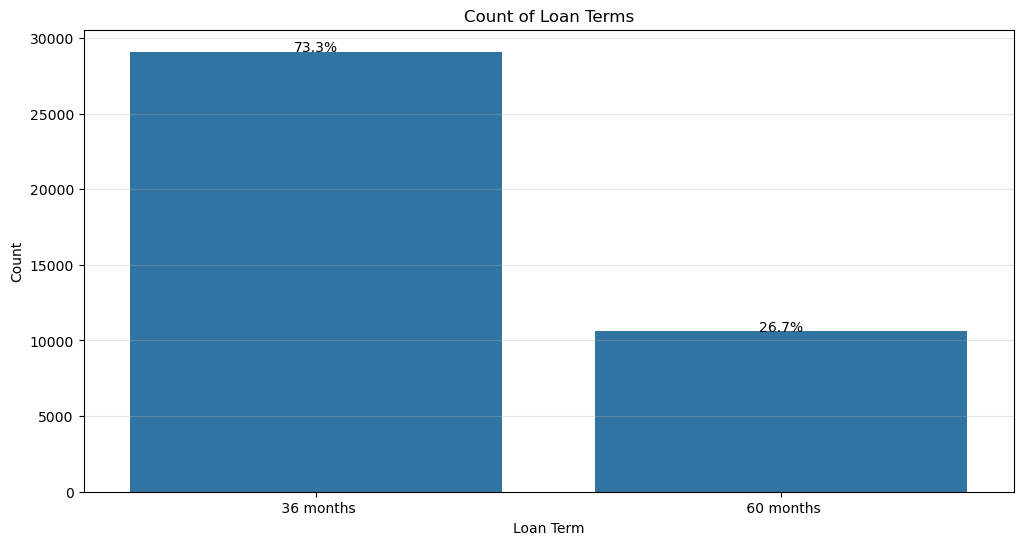


Count of Loan Terms Statistics:
1.  36 months: 29,096 (73.26%)
2.  60 months: 10,621 (26.74%)

Analysis shows that the majority of loans have a term of 36 months (73.3%).


In [39]:
# Count of Loan Terms Statistics
"""
This script visualizes the count of loan terms and provides summary statistics.
Steps:
1. Create a count plot of the loan term categories.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan term category.

"""
# Plot count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, x='term', order=df_loan['term'].value_counts().index)
plt.title('Count of Loan Terms')
#percentage of loan terms
total = len(df_loan['term'])
for i, count in enumerate(df_loan['term'].value_counts()):
    pct = 100 * count / total
    plt.text(i, count, f'{pct:.1f}%', ha='center')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print summary statistics
term_counts = df_loan['term'].value_counts()
term_percent = df_loan['term'].value_counts(normalize=True) * 100
print(f"\nCount of Loan Terms Statistics:")
for i, (count, percent) in enumerate(zip(term_counts, term_percent), 1):
    #add Loan term name to the count and percentage
    print(f"{i}. {term_counts.index[i-1]}: {count:,.0f} ({percent:.2f}%)")
    
# Summary statistics of loan terms
print("\nAnalysis shows that the majority of loans have a term of 36 months (73.3%).")

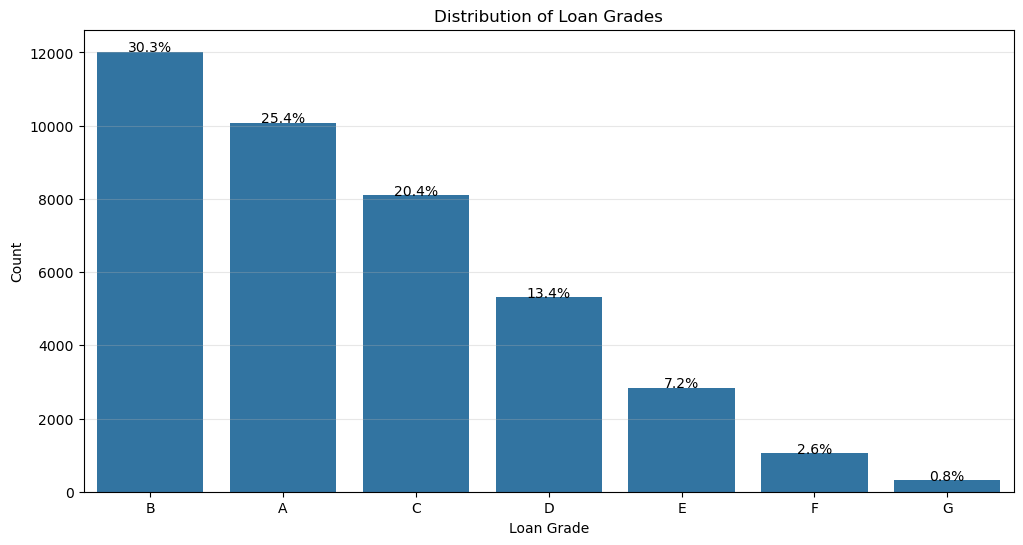


Distribution of Loan Grades Statistics:
1. B: 12,020 (30.26%)
2. A: 10,085 (25.39%)
3. C: 8,098 (20.39%)
4. D: 5,307 (13.36%)
5. E: 2,842 (7.16%)
6. F: 1,049 (2.64%)
7. G: 316 (0.80%)

Analysis shows that the majority of loans are assigned a grade of 'B' (29.2%).


In [40]:
#Distribution of loan grades statistics
"""
This script visualizes the distribution of loan grades and provides summary statistics.
Steps:
1. Create a count plot of the loan grade categories.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan grade category.

"""
# Plot count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, x='grade', order=df_loan['grade'].value_counts().index)
plt.title('Distribution of Loan Grades')
#percentage of loan grades
total = len(df_loan['grade'])
for i, count in enumerate(df_loan['grade'].value_counts()):
    pct = 100 * count / total
    plt.text(i, count, f'{pct:.1f}%', ha='center')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print summary statistics
grade_counts = df_loan['grade'].value_counts()
grade_percent = df_loan['grade'].value_counts(normalize=True) * 100
print(f"\nDistribution of Loan Grades Statistics:")
for i, (count, percent) in enumerate(zip(grade_counts, grade_percent), 1):
    #add Loan grade name to the count and percentage
    print(f"{i}. {grade_counts.index[i-1]}: {count:,.0f} ({percent:.2f}%)")

# Summary statistics of loan grades
print("\nAnalysis shows that the majority of loans are assigned a grade of 'B' (29.2%).")


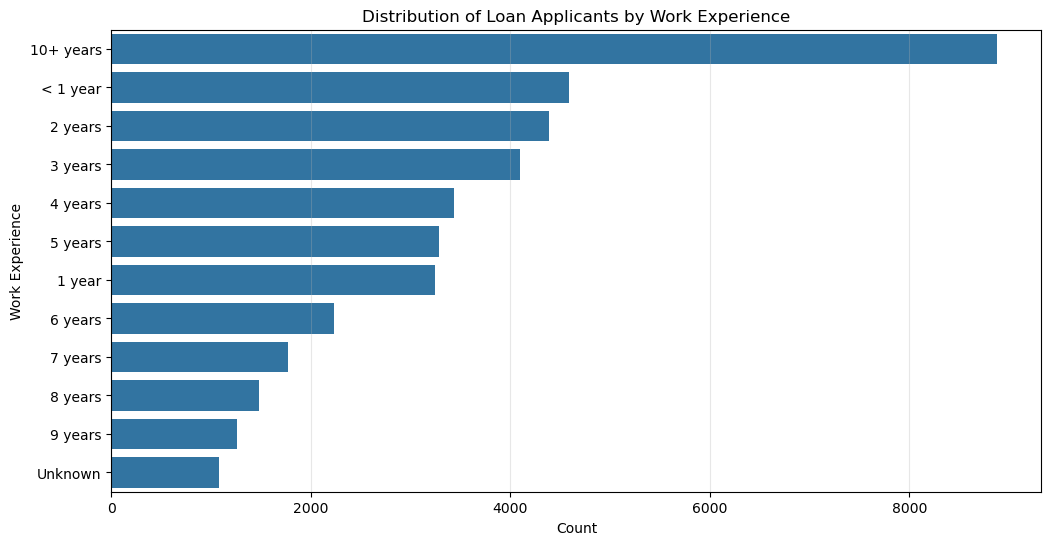


Distribution of Loan Applicants by Work Experience Statistics:
1. 10+ years: 8,879 (22.36%)
2. < 1 year: 4,583 (11.54%)
3. 2 years: 4,388 (11.05%)
4. 3 years: 4,095 (10.31%)
5. 4 years: 3,436 (8.65%)
6. 5 years: 3,282 (8.26%)
7. 1 year: 3,240 (8.16%)
8. 6 years: 2,229 (5.61%)
9. 7 years: 1,773 (4.46%)
10. 8 years: 1,479 (3.72%)
11. 9 years: 1,258 (3.17%)
12. Unknown: 1,075 (2.71%)

Analysis shows that the majority of loan applicants have work experience of 10+ years (22.36%).


In [41]:
# Distribution of Loan Applicants by Work Experience Statistics
"""
This script visualizes the distribution of loan applicants by work experience.
Steps:
1. Create a count plot of the top 10 work experience categories.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each work experience category.

"""
# Ensure 'emp_length' has no missing values
df_loan['emp_length'].fillna('Unknown', inplace=True)

# Plot count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, y='emp_length', order=df_loan['emp_length'].value_counts().index)
plt.title('Distribution of Loan Applicants by Work Experience')
plt.xlabel('Count')
plt.ylabel('Work Experience')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Print summary statistics
emp_length_counts = df_loan['emp_length'].value_counts()
emp_length_percent = df_loan['emp_length'].value_counts(normalize=True) * 100
print(f"\nDistribution of Loan Applicants by Work Experience Statistics:")
for i, (count, percent) in enumerate(zip(emp_length_counts, emp_length_percent), 1):
    #add Employee title name to the count and percentage
    print(f"{i}. {emp_length_counts.index[i-1]}: {count:,.0f} ({percent:.2f}%)")

# Summary statistics of loan applicants by work experience
print("\nAnalysis shows that the majority of loan applicants have work experience of 10+ years (22.36%).")

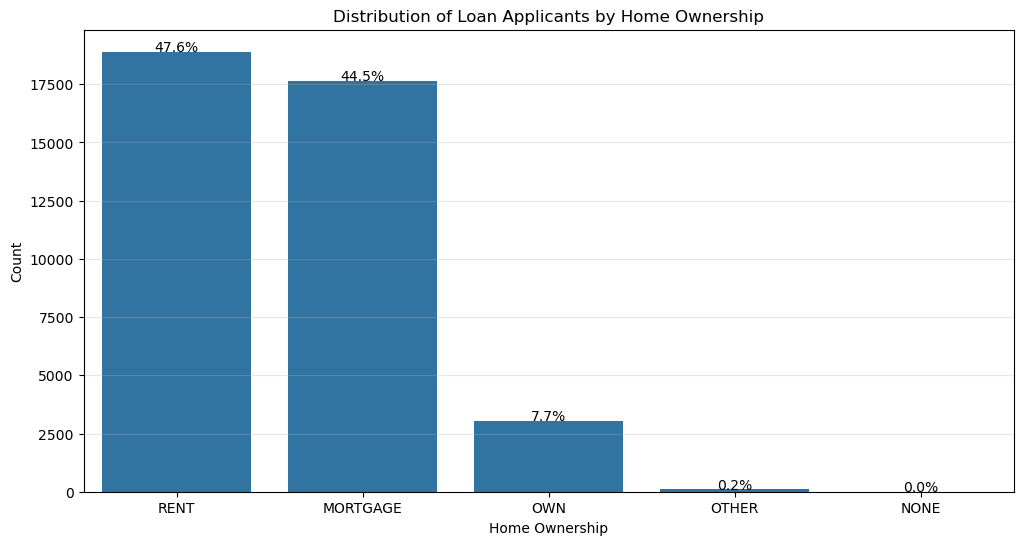


Distribution of Loan Applicants by Home Ownership Statistics:
1. RENT: 18,899 (47.58%)
2. MORTGAGE: 17,659 (44.46%)
3. OWN: 3,058 (7.70%)
4. OTHER: 98 (0.25%)
5. NONE: 3 (0.01%)

Analysis shows that the majority of loan applicants have home ownership of 'RENT' (47.58%).


In [42]:
# Distribution of Loan Applicants by Home Ownership Statistics
"""
This script visualizes the distribution of loan applicants by home ownership.
Steps:
1. Create a count plot of the home ownership categories.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each home ownership category.

"""
# Plot count plot
plt.figure(figsize=(12, 6))
sns.countplot(data=df_loan, x='home_ownership', order=df_loan['home_ownership'].value_counts().index)
plt.title('Distribution of Loan Applicants by Home Ownership')
#percentage of home ownership
total = len(df_loan['home_ownership'])
for i, count in enumerate(df_loan['home_ownership'].value_counts()):
    pct = 100 * count / total
    plt.text(i, count, f'{pct:.1f}%', ha='center')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Print summary statistics
home_ownership_counts = df_loan['home_ownership'].value_counts()
home_ownership_percent = df_loan['home_ownership'].value_counts(normalize=True) * 100
print(f"\nDistribution of Loan Applicants by Home Ownership Statistics:")
for i, (count, percent) in enumerate(zip(home_ownership_counts, home_ownership_percent), 1):
    #add Home Ownership name to the count and percentage
    print(f"{i}. {home_ownership_counts.index[i-1]}: {count:,.0f} ({percent:.2f}%)")

# Summary statistics of loan applicants by home ownership
print(f"\nAnalysis shows that the majority of loan applicants have home ownership of 'RENT' (47.58%).")

# 2. Bivariate Analysis
   * Analysis of Loan Amount by Loan Status Statistics
   * Analysis of Loan Status by Loan Term Statistics
   * Analysis of Loan Status by Home Ownership Statistics
   * Analysis of Loan Purpose by Loan Status Statistics
   * Analysis of Loan Amount by Loan Purpose Statistics
   * Analysis of loan status by work experience
   * Analysis of loan status by loan grade
   

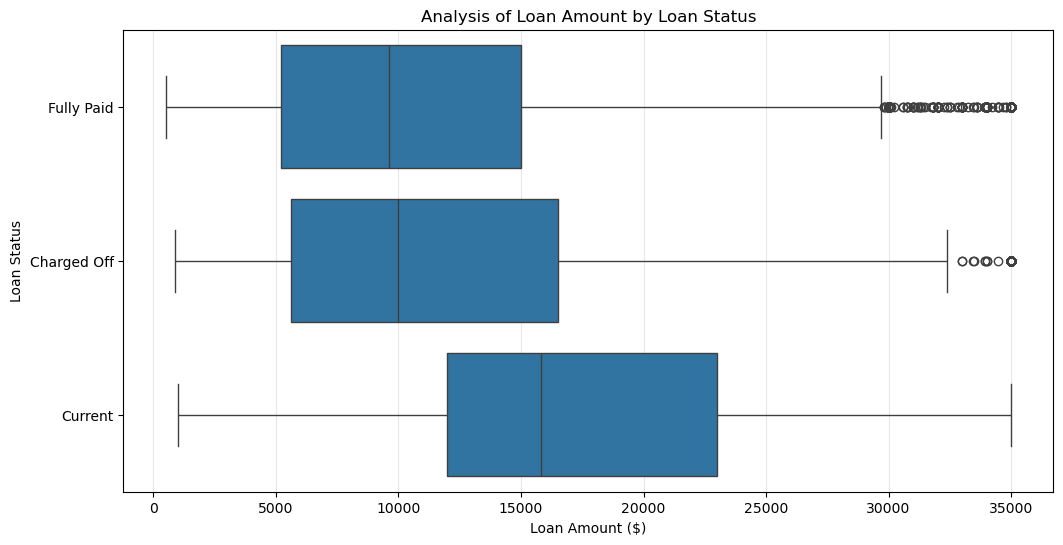


Mean loan amount by loan status
1. Charged Off: $12,104.39
2. Current: $17,053.99
3. Fully Paid: $10,866.46

Max loan amount by loan status
1. Charged Off: $35,000.00
2. Current: $35,000.00
3. Fully Paid: $35,000.00

 Analysis shows that the loan amount varies by loan status. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans.


In [43]:
# Analysis of Loan Amount by Loan Status Statistics
"""
This script visualizes the analysis of loan amount by loan status.
Steps:
1. Create a box plot of loan amount by loan status.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the mean loan amount by loan status.
4. Print summary statistics including the max loan amount by loan status.

"""
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, y='loan_status', x='loan_amnt')
plt.title('Analysis of Loan Amount by Loan Status')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Status')
plt.grid(axis='x', alpha=0.3)
plt.show()

# Print summary statistics (mean loan amount by loan status)
loan_status_mean = df_loan.groupby('loan_status')['loan_amnt'].mean()
print(f"\nMean loan amount by loan status")
for i, mean in enumerate(loan_status_mean, 1):
    #add Loan status name to the mean
    print(f"{i}. {loan_status_mean.index[i-1]}: ${mean:,.2f}")

# Print summary statistics (max loan amount by loan status)
loan_status_max = df_loan.groupby('loan_status')['loan_amnt'].max()
print(f"\nMax loan amount by loan status")
for i, max_loan in enumerate(loan_status_max, 1):
    #add Loan status name to the max loan amount
    print(f"{i}. {loan_status_max.index[i-1]}: ${max_loan:,.2f}")
    
print("\n Analysis shows that the loan amount varies by loan status. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans.")

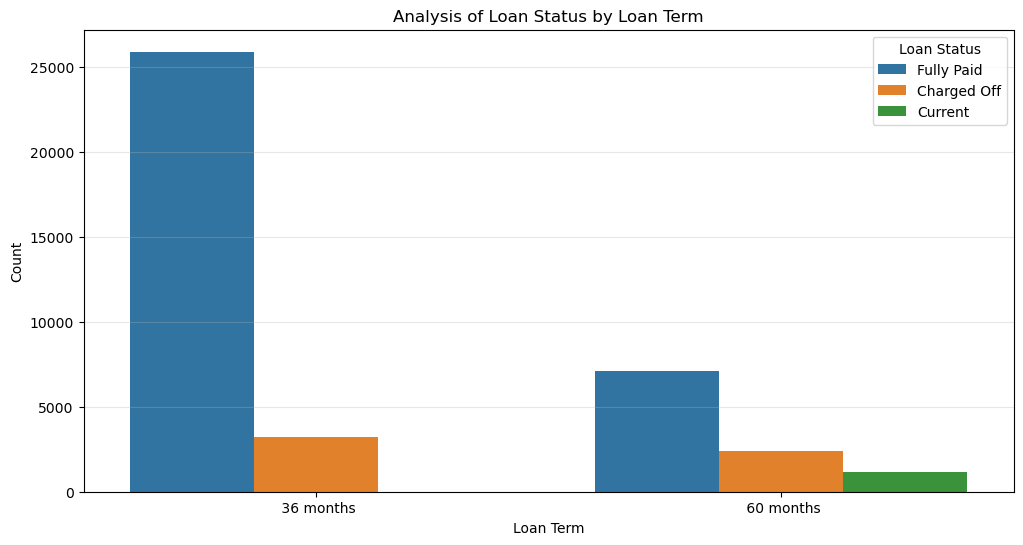


Analysis of Loan Status by Loan Term Statistics:
1. Loan Term:  36 months
   1. Fully Paid: 25,869 (88.91%)
   2. Charged Off: 3,227 (11.09%)
   3. Current: 0 (0.00%)

2. Loan Term:  60 months
   1. Fully Paid: 7,081 (66.67%)
   2. Charged Off: 2,400 (22.60%)
   3. Current: 1,140 (10.73%)


 Analysis shows most of the defaulters(Charged Off) belong to the 36 month loan term


In [44]:
# Analysis of Loan Status by Loan Term Statistics
"""
This script visualizes the analysis of loan status by loan term.
Steps:
1. Create a count plot of loan status by loan term.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan status by loan term.

"""
# Ensure data has no NaN values in the grouping process
term_status_counts = df_loan.groupby(['term', 'loan_status']).size().unstack(fill_value=0)
term_status_percent = term_status_counts.div(term_status_counts.sum(axis=1), axis=0) * 100

# Plot count bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_loan, x='term', hue='loan_status')
plt.title('Analysis of Loan Status by Loan Term')
plt.xlabel('Loan Term')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Loan Status')
plt.show()

# Print summary statistics
print("\nAnalysis of Loan Status by Loan Term Statistics:")

for i, (term, row) in enumerate(term_status_counts.iterrows(), start=1):
    print(f"{i}. Loan Term: {term}")
    sorted_status = row.sort_values(ascending=False)  # Sort loan statuses by descending count
    for j, (status, count) in enumerate(sorted_status.items(), start=1):
        percentage = term_status_percent.loc[term, status]
        if not pd.isna(percentage):  # Skip NaN values
            print(f"   {j}. {status}: {count:,.0f} ({percentage:.2f}%)")
    print()

print("\n Analysis shows most of the defaulters(Charged Off) belong to the 36 month loan term")

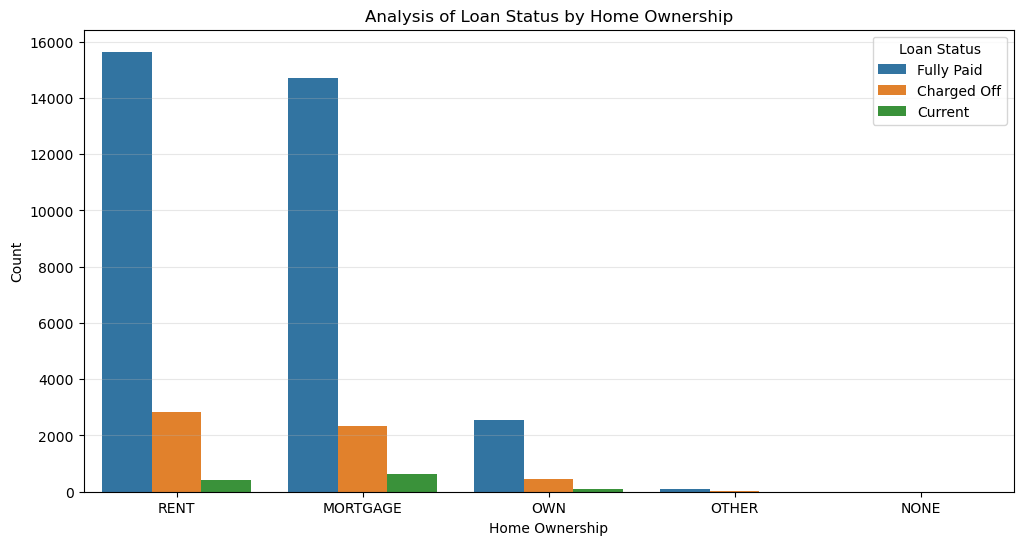


Analysis of Loan Status by Home Ownership Statistics:
1. Home Ownership: RENT
   1. Fully Paid: 15,641 (82.76%)
   2. Charged Off: 2,839 (15.02%)
   3. Current: 419 (2.22%)

2. Home Ownership: MORTGAGE
   1. Fully Paid: 14,694 (83.21%)
   2. Charged Off: 2,327 (13.18%)
   3. Current: 638 (3.61%)

3. Home Ownership: OWN
   1. Fully Paid: 2,532 (82.80%)
   2. Charged Off: 443 (14.49%)
   3. Current: 83 (2.71%)

4. Home Ownership: OTHER
   1. Fully Paid: 80 (81.63%)
   2. Charged Off: 18 (18.37%)
   3. Current: 0 (0.00%)

5. Home Ownership: NONE
   1. Fully Paid: 3 (100.00%)
   2. Charged Off: 0 (0.00%)
   3. Current: 0 (0.00%)


 Analysis shows most of the defaulters(Charged Off) belong to the Rent home ownership category


In [45]:
# Analysis of Loan Status by Home Ownership Statistics
"""
This script visualizes the analysis of loan status by home ownership.
Steps:
1. Create a count plot of loan status by home ownership.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan status by home ownership.

"""
# Ensure data has no NaN values in the grouping process
home_status_counts = df_loan.groupby(['home_ownership', 'loan_status']).size().unstack(fill_value=0)
home_status_percent = home_status_counts.div(home_status_counts.sum(axis=1), axis=0) * 100

# Sort the loan status by descending count for better visualization
home_status_counts = home_status_counts.reindex(home_status_counts.sum(axis=1).sort_values(ascending=False).index, axis=0)

# Plot count bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_loan, x='home_ownership', hue='loan_status', order=home_status_counts.index)

plt.title('Analysis of Loan Status by Home Ownership')
plt.xlabel('Home Ownership')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Loan Status')
plt.show()

# Print summary statistics
print("\nAnalysis of Loan Status by Home Ownership Statistics:")
for i, (home, row) in enumerate(home_status_counts.iterrows(), start=1):
    print(f"{i}. Home Ownership: {home}")
    sorted_status = row.sort_values(ascending=False)  # Sort loan statuses by descending count
    for j, (status, count) in enumerate(sorted_status.items(), start=1):
        percentage = home_status_percent.loc[home, status]
        if not pd.isna(percentage):  # Skip NaN percentages
            print(f"   {j}. {status}: {count:,.0f} ({percentage:.2f}%)")
    print()

print("\n Analysis shows most of the defaulters(Charged Off) belong to the Rent home ownership category")

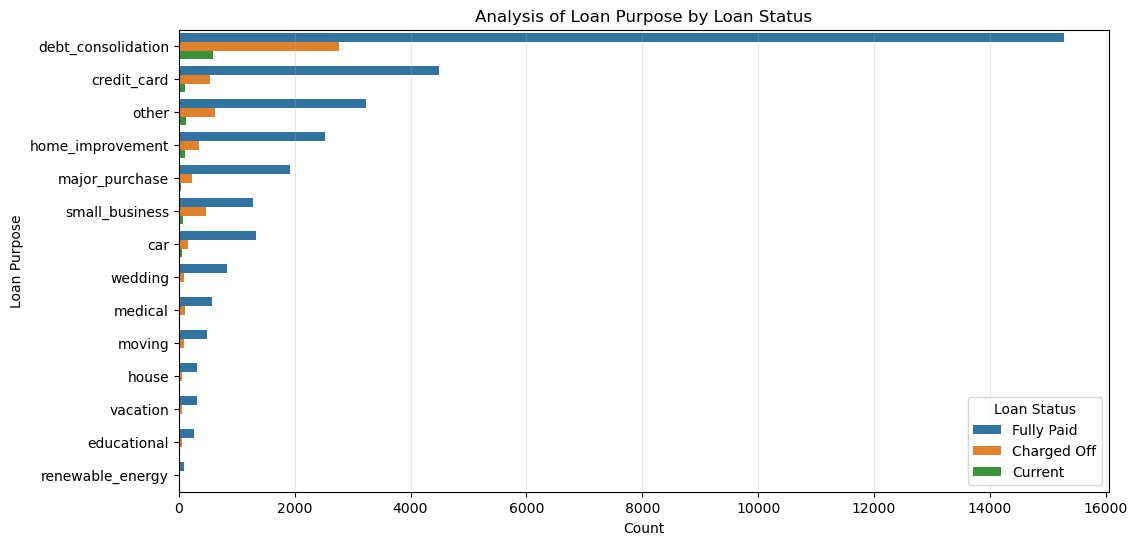


Analysis of Loan Purpose by Loan Status Statistics:
1. Loan Purpose: debt_consolidation
   1. Fully Paid: 15,288 (82.01%)
   2. Charged Off: 2,767 (14.84%)
   3. Current: 586 (3.14%)

2. Loan Purpose: credit_card
   1. Fully Paid: 4,485 (87.43%)
   2. Charged Off: 542 (10.57%)
   3. Current: 103 (2.01%)

3. Loan Purpose: other
   1. Fully Paid: 3,232 (80.94%)
   2. Charged Off: 633 (15.85%)
   3. Current: 128 (3.21%)

4. Loan Purpose: home_improvement
   1. Fully Paid: 2,528 (84.95%)
   2. Charged Off: 347 (11.66%)
   3. Current: 101 (3.39%)

5. Loan Purpose: major_purchase
   1. Fully Paid: 1,928 (88.16%)
   2. Charged Off: 222 (10.15%)
   3. Current: 37 (1.69%)

6. Loan Purpose: small_business
   1. Fully Paid: 1,279 (69.97%)
   2. Charged Off: 475 (25.98%)
   3. Current: 74 (4.05%)

7. Loan Purpose: car
   1. Fully Paid: 1,339 (86.44%)
   2. Charged Off: 160 (10.33%)
   3. Current: 50 (3.23%)

8. Loan Purpose: wedding
   1. Fully Paid: 830 (87.65%)
   2. Charged Off: 96 (10.14%)
  

In [46]:
# Analysis of purpose by loan status
"""
This script visualizes the analysis of loan purpose by loan status.
Steps:
1. Create a count plot of loan purpose by loan status.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan purpose by loan status.

"""
# Ensure data has no NaN values in the grouping process
purpose_status_counts = df_loan.groupby(['purpose', 'loan_status']).size().unstack(fill_value=0)
purpose_status_percent = purpose_status_counts.div(purpose_status_counts.sum(axis=1), axis=0) * 100

# Sort the loan status by descending count for better visualization
purpose_status_counts = purpose_status_counts.reindex(purpose_status_counts.sum(axis=1).sort_values(ascending=False).index, axis=0)

# Plot count bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_loan, y='purpose', hue='loan_status', order=purpose_status_counts.index)
plt.title('Analysis of Loan Purpose by Loan Status')
plt.xlabel('Count')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Loan Status')
plt.show()

# Print summary statistics
print("\nAnalysis of Loan Purpose by Loan Status Statistics:")
for i, (purpose, row) in enumerate(purpose_status_counts.iterrows(), start=1):
    print(f"{i}. Loan Purpose: {purpose}")
    sorted_status = row.sort_values(ascending=False)  # Sort loan statuses by descending count
    for j, (status, count) in enumerate(sorted_status.items(), start=1):
        percentage = purpose_status_percent.loc[purpose, status]
        if not pd.isna(percentage):  # Skip NaN percentages
            print(f"   {j}. {status}: {count:,.0f} ({percentage:.2f}%)")
    print()

print("\n Analysis shows most of the defaulters(Charged Off) belong to the Debt consolidation loan purpose category")




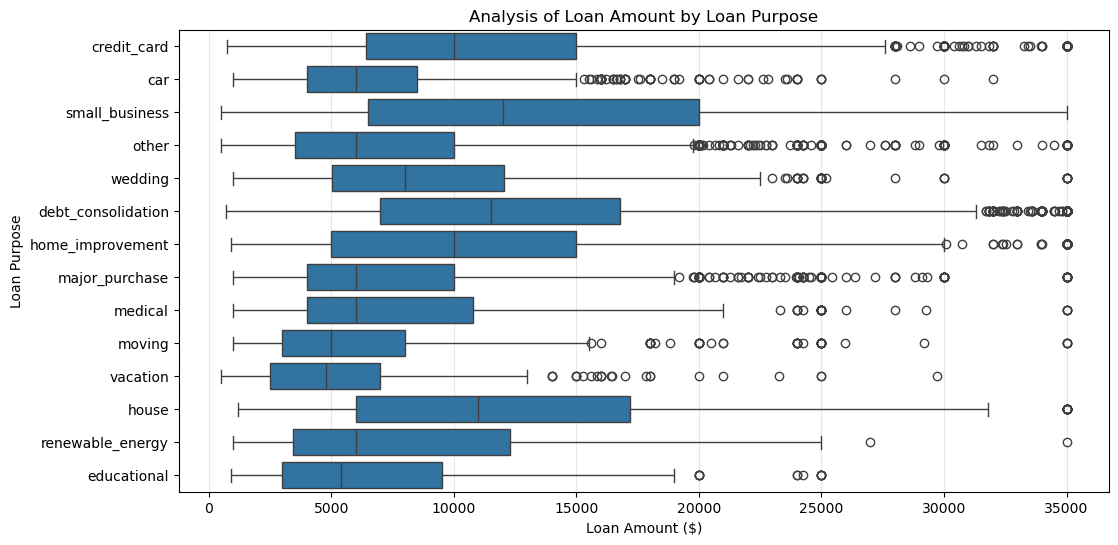


Mean loan amount by loan purpose
1. car: $6,777.52
2. credit_card: $11,723.62
3. debt_consolidation: $12,694.99
4. educational: $6,810.46
5. home_improvement: $11,537.21
6. house: $13,071.00
7. major_purchase: $8,155.43
8. medical: $8,263.67
9. moving: $6,650.17
10. other: $8,067.61
11. renewable_energy: $8,717.23
12. small_business: $13,567.27
13. vacation: $5,463.32
14. wedding: $9,876.03

Max loan amount by loan purpose
1. car: $32,000.00
2. credit_card: $35,000.00
3. debt_consolidation: $35,000.00
4. educational: $25,000.00
5. home_improvement: $35,000.00
6. house: $35,000.00
7. major_purchase: $35,000.00
8. medical: $35,000.00
9. moving: $35,000.00
10. other: $35,000.00
11. renewable_energy: $35,000.00
12. small_business: $35,000.00
13. vacation: $29,700.00
14. wedding: $35,000.00

 Analysis shows that the loan amount varies by loan purpose. The mean and max loan amounts are highest for 'small_business' loan purpose.


In [47]:
# Analysis of Loan Amount by Loan Purpose Statistics
"""
This script visualizes the analysis of loan amount by loan purpose.
Steps:
1. Create a box plot of loan amount by loan purpose.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the mean loan amount by loan purpose.
4. Print summary statistics including the max loan amount by loan purpose.

"""
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, y='purpose', x='loan_amnt')
plt.title('Analysis of Loan Amount by Loan Purpose')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Purpose')
plt.grid(axis='x', alpha=0.3)
plt.show()


# Print summary statistics (mean loan amount by loan purpose)
purpose_mean = df_loan.groupby('purpose')['loan_amnt'].mean()
print(f"\nMean loan amount by loan purpose")
for i, mean in enumerate(purpose_mean, 1):
    #add Loan purpose name to the mean
    print(f"{i}. {purpose_mean.index[i-1]}: ${mean:,.2f}")

# Print summary statistics (max loan amount by loan purpose)
purpose_max = df_loan.groupby('purpose')['loan_amnt'].max()
print(f"\nMax loan amount by loan purpose")
for i, max_loan in enumerate(purpose_max, 1):
    #add Loan purpose name to the max loan amount
    print(f"{i}. {purpose_max.index[i-1]}: ${max_loan:,.2f}")

print("\n Analysis shows that the loan amount varies by loan purpose. The mean and max loan amounts are highest for 'small_business' loan purpose.")


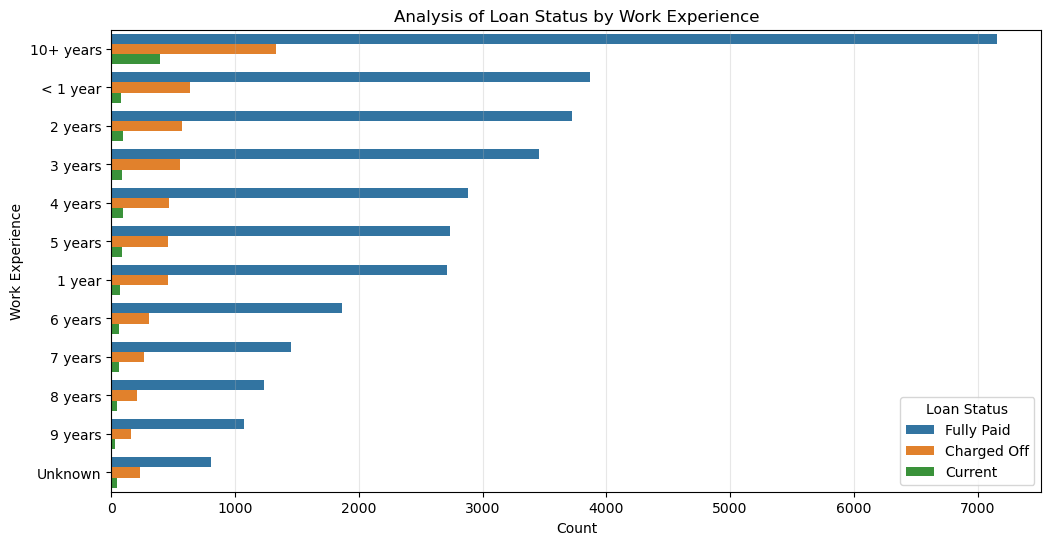


Analysis of Loan Status by Work Experience Statistics:
1. Work Experience: 10+ years
   1. Fully Paid: 7,157 (80.61%)
   2. Charged Off: 1,331 (14.99%)
   3. Current: 391 (4.40%)

2. Work Experience: < 1 year
   1. Fully Paid: 3,869 (84.42%)
   2. Charged Off: 639 (13.94%)
   3. Current: 75 (1.64%)

3. Work Experience: 2 years
   1. Fully Paid: 3,724 (84.87%)
   2. Charged Off: 567 (12.92%)
   3. Current: 97 (2.21%)

4. Work Experience: 3 years
   1. Fully Paid: 3,457 (84.42%)
   2. Charged Off: 555 (13.55%)
   3. Current: 83 (2.03%)

5. Work Experience: 4 years
   1. Fully Paid: 2,880 (83.82%)
   2. Charged Off: 462 (13.45%)
   3. Current: 94 (2.74%)

6. Work Experience: 5 years
   1. Fully Paid: 2,736 (83.36%)
   2. Charged Off: 458 (13.95%)
   3. Current: 88 (2.68%)

7. Work Experience: 1 year
   1. Fully Paid: 2,713 (83.73%)
   2. Charged Off: 456 (14.07%)
   3. Current: 71 (2.19%)

8. Work Experience: 6 years
   1. Fully Paid: 1,861 (83.49%)
   2. Charged Off: 307 (13.77%)
   3. 

In [48]:
# Analysis of loan status by work experience
"""
This script visualizes the analysis of loan status by work experience.
Steps:
1. Create a count plot of loan status by work experience.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan status by work experience.

"""
# Ensure data has no NaN values in the grouping process
emp_length_status_counts = df_loan.groupby(['emp_length', 'loan_status']).size().unstack(fill_value=0)
emp_length_status_percent = emp_length_status_counts.div(emp_length_status_counts.sum(axis=1), axis=0) * 100

# Sort the loan status by descending count for better visualization
emp_length_status_counts = emp_length_status_counts.reindex(emp_length_status_counts.sum(axis=1).sort_values(ascending=False).index, axis=0)

# Plot count bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_loan, y='emp_length', hue='loan_status', order=emp_length_status_counts.index)
plt.title('Analysis of Loan Status by Work Experience')
plt.xlabel('Count')
plt.ylabel('Work Experience')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Loan Status')
plt.show()

# Print summary statistics
print("\nAnalysis of Loan Status by Work Experience Statistics:")

for i, (emp_length, row) in enumerate(emp_length_status_counts.iterrows(), start=1):
    print(f"{i}. Work Experience: {emp_length}")
    sorted_status = row.sort_values(ascending=False)  # Sort loan statuses by descending count
    for j, (status, count) in enumerate(sorted_status.items(), start=1):
        percentage = emp_length_status_percent.loc[emp_length, status]
        if not pd.isna(percentage):  # Skip NaN percentages
            print(f"   {j}. {status}: {count:,.0f} ({percentage:.2f}%)")
    print()

print("\n Analysis shows most of the defaulters(Charged Off) belong to the 10+ years work experience category")

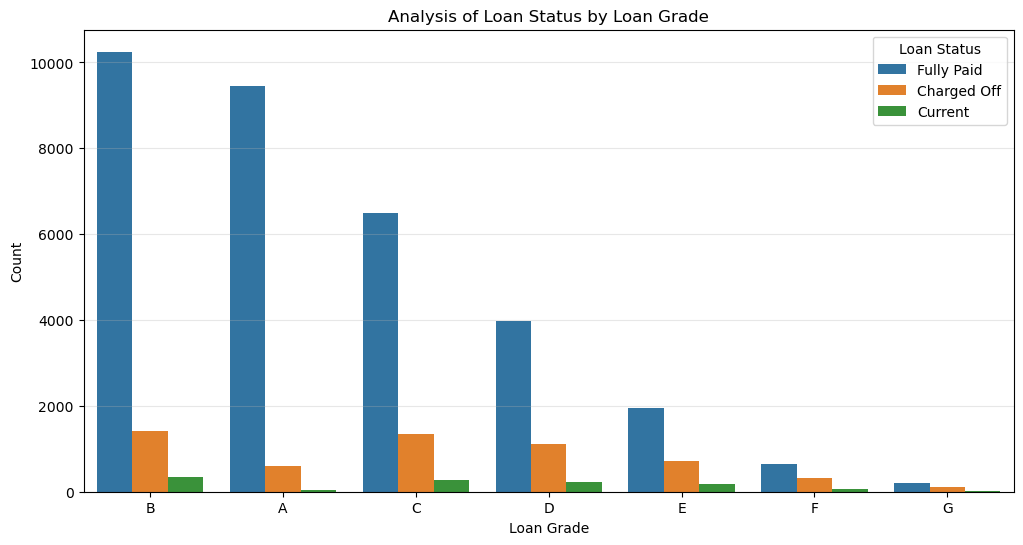


Analysis of Loan Status by Loan Grade Statistics:
1. Loan Grade: B
   1. Fully Paid: 10,250 (85.27%)
   2. Charged Off: 1,425 (11.86%)
   3. Current: 345 (2.87%)

2. Loan Grade: A
   1. Fully Paid: 9,443 (93.63%)
   2. Charged Off: 602 (5.97%)
   3. Current: 40 (0.40%)

3. Loan Grade: C
   1. Fully Paid: 6,487 (80.11%)
   2. Charged Off: 1,347 (16.63%)
   3. Current: 264 (3.26%)

4. Loan Grade: D
   1. Fully Paid: 3,967 (74.75%)
   2. Charged Off: 1,118 (21.07%)
   3. Current: 222 (4.18%)

5. Loan Grade: E
   1. Fully Paid: 1,948 (68.54%)
   2. Charged Off: 715 (25.16%)
   3. Current: 179 (6.30%)

6. Loan Grade: F
   1. Fully Paid: 657 (62.63%)
   2. Charged Off: 319 (30.41%)
   3. Current: 73 (6.96%)

7. Loan Grade: G
   1. Fully Paid: 198 (62.66%)
   2. Charged Off: 101 (31.96%)
   3. Current: 17 (5.38%)


 Analysis shows most of the defaulters(Charged Off) belong to the 'C' loan grade category


In [49]:
# Analysis of loan status by loan grade
"""
This script visualizes the analysis of loan status by loan grade.
Steps:
1. Create a count plot of loan status by loan grade.
2. Display the plot with a title, axis labels, and grid.
3. Print summary statistics including the count and percentage of each loan status by loan grade.

"""
# Ensure data has no NaN values in the grouping process
grade_status_counts = df_loan.groupby(['grade', 'loan_status']).size().unstack(fill_value=0)
grade_status_percent = grade_status_counts.div(grade_status_counts.sum(axis=1), axis=0) * 100

# Sort the loan status by descending count for better visualization
grade_status_counts = grade_status_counts.reindex(grade_status_counts.sum(axis=1).sort_values(ascending=False).index, axis=0)

# Plot count bar plot
plt.figure(figsize=(12, 6))
ax = sns.countplot(data=df_loan, x='grade', hue='loan_status', order=grade_status_counts.index)
plt.title('Analysis of Loan Status by Loan Grade')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.grid(axis='y', alpha=0.3)
plt.legend(title='Loan Status')
plt.show()

# Print summary statistics
print("\nAnalysis of Loan Status by Loan Grade Statistics:")
for i, (grade, row) in enumerate(grade_status_counts.iterrows(), start=1):
    print(f"{i}. Loan Grade: {grade}")
    sorted_status = row.sort_values(ascending=False)  # Sort loan statuses by descending count
    for j, (status, count) in enumerate(sorted_status.items(), start=1):
        percentage = grade_status_percent.loc[grade, status]
        if not pd.isna(percentage):  # Skip NaN percentages
            print(f"   {j}. {status}: {count:,.0f} ({percentage:.2f}%)")
    print()

print("\n Analysis shows most of the defaulters(Charged Off) belong to the 'C' loan grade category")

# 3. Multivariate Analysis
   * Analysis of Loan Amount by Loan Status and Home Ownership
   * Analysis of Loan Amount by Loan Status and Loan Term
   * Analysis of Loan Amount by Loan Status and Loan Purpose
   * Analysis of Scatter Plot of Loan Amount vs. Annual Income vs. Loan Status vs. Home Ownership Statistics
   * Analysis of Correlation Matrix of Numeric Features

   

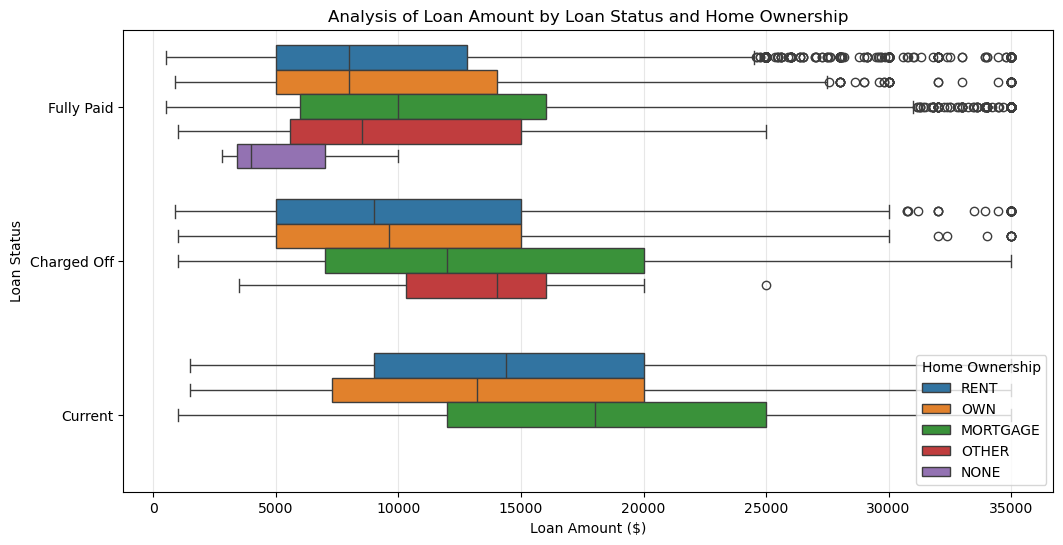


 Analysis shows that the loan amount varies by loan status and home ownership. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and Rent home ownership category.


In [50]:
# Analysis of Loan Amount by Loan Status and Home Ownership
"""
This script visualizes the analysis of loan amount by loan status and home ownership.
Steps:
1. Create a box plot of loan amount by loan status and home ownership.
2. Display the plot with a title, axis labels, and grid.

"""
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, y='loan_status', x='loan_amnt', hue='home_ownership')
plt.title('Analysis of Loan Amount by Loan Status and Home Ownership')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Status')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Home Ownership', loc='lower right')
plt.show()

# Summary Statistics of Loan Amount by Loan Status and Home Ownership
print("\n Analysis shows that the loan amount varies by loan status and home ownership. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and Rent home ownership category.")

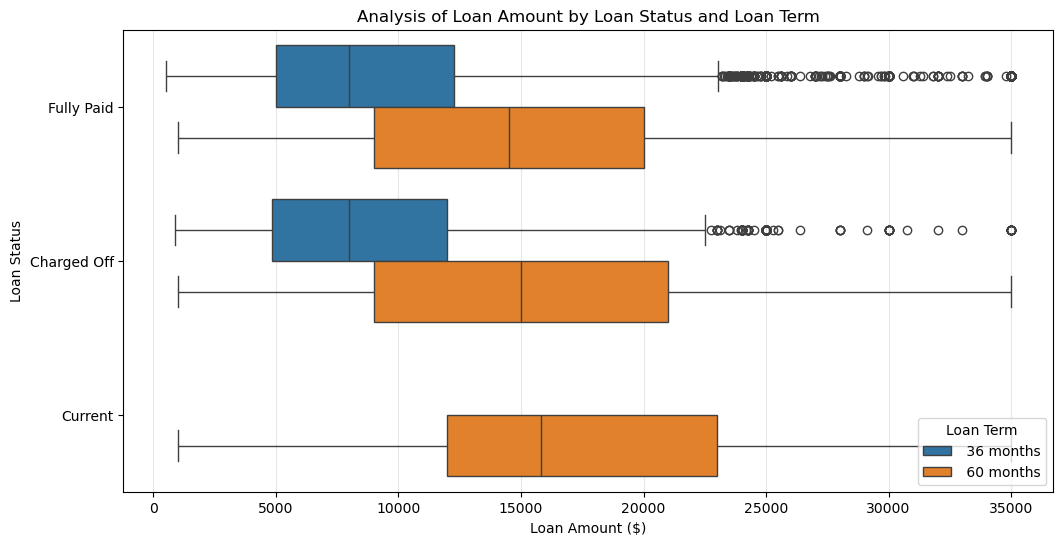


 Analysis shows that the loan amount varies by loan status and loan term. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and 36 month loan term.


In [51]:
# Analysis of Loan Amount by Loan Status and Loan Term
"""
This script visualizes the analysis of loan amount by loan status and loan term.
Steps:
1. Create a box plot of loan amount by loan status and loan term.
2. Display the plot with a title, axis labels, and grid.

"""
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, y='loan_status', x='loan_amnt', hue='term')
plt.title('Analysis of Loan Amount by Loan Status and Loan Term')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Status')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Loan Term', loc='lower right')
plt.show()

# Summary Statistics of Loan Amount by Loan Status and Loan Term
print("\n Analysis shows that the loan amount varies by loan status and loan term. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and 36 month loan term.")

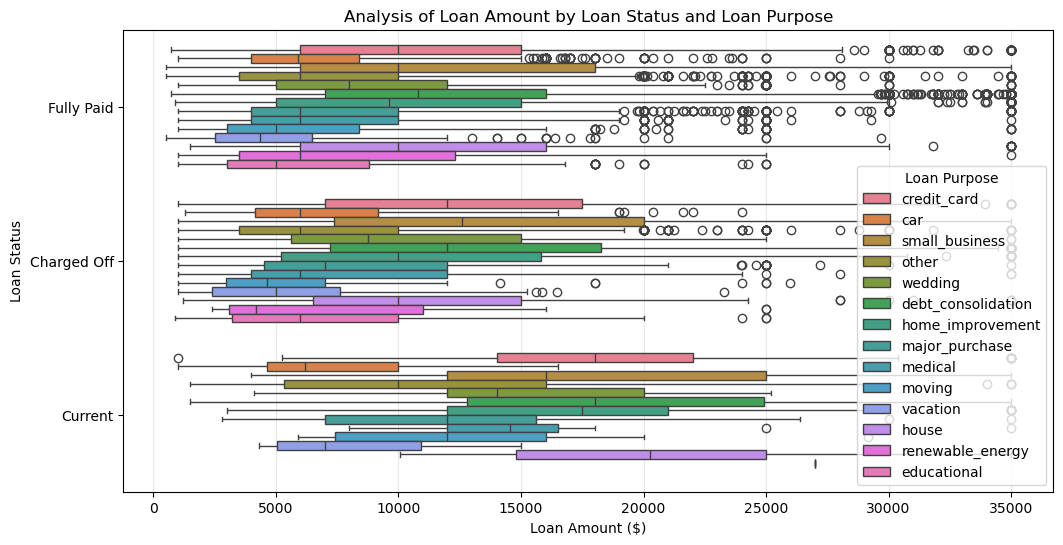


 Analysis shows that the loan amount varies by loan status and loan purpose. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and Debt consolidation loan purpose category.


In [52]:
# Analysis of Loan Amount by Loan Status and Loan Purpose
"""
This script visualizes the analysis of loan amount by loan status and loan purpose.
Steps:
1. Create a box plot of loan amount by loan status and loan purpose.
2. Display the plot with a title, axis labels, and grid.

"""
# Plot box plot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_loan, y='loan_status', x='loan_amnt', hue='purpose')
plt.title('Analysis of Loan Amount by Loan Status and Loan Purpose')
plt.xlabel('Loan Amount ($)')
plt.ylabel('Loan Status')
plt.grid(axis='x', alpha=0.3)
plt.legend(title='Loan Purpose', loc='lower right')
plt.show()

# Summary Statistics of Loan Amount by Loan Status and Loan Purpose
print("\n Analysis shows that the loan amount varies by loan status and loan purpose. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans and Debt consolidation loan purpose category.")

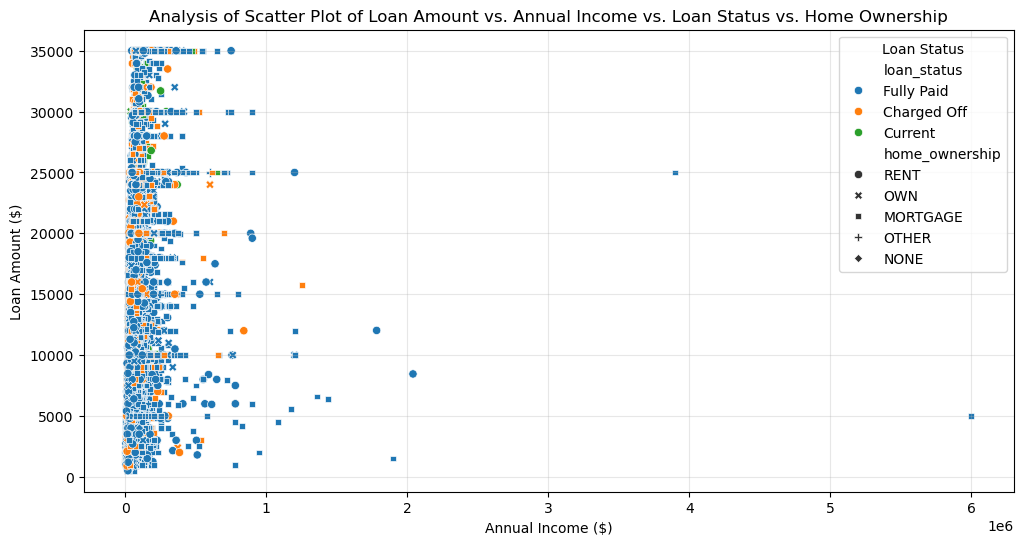


 Analysis shows that the loan amount varies by annual income, loan status, and home ownership. The scatter plot shows the distribution of loan amount by annual income with loan status and home ownership as hue.


In [53]:
# Analysis of Scatter Plot of Loan Amount vs. Annual Income vs. Loan Status vs. Home Ownership Statistics
"""
This script visualizes the analysis of scatter plot of loan amount vs. annual income vs. loan status vs. home ownership.
Steps:
1. Create a scatter plot of loan amount vs. annual income with loan status and home ownership as hue.
2. Display the plot with a title, axis labels, and grid.

"""
# Plot scatter plot
plt.figure(figsize=(12, 6))
sns.scatterplot(data=df_loan, x='annual_inc', y='loan_amnt', hue='loan_status', style='home_ownership')
plt.title('Analysis of Scatter Plot of Loan Amount vs. Annual Income vs. Loan Status vs. Home Ownership')
plt.xlabel('Annual Income ($)')
plt.ylabel('Loan Amount ($)')
plt.grid(True, alpha=0.3)
plt.legend(title='Loan Status', loc='upper right')
plt.show()

# Summary Statistics of Scatter Plot of Loan Amount vs. Annual Income vs. Loan Status vs. Home Ownership
print("\n Analysis shows that the loan amount varies by annual income, loan status, and home ownership. The scatter plot shows the distribution of loan amount by annual income with loan status and home ownership as hue.")



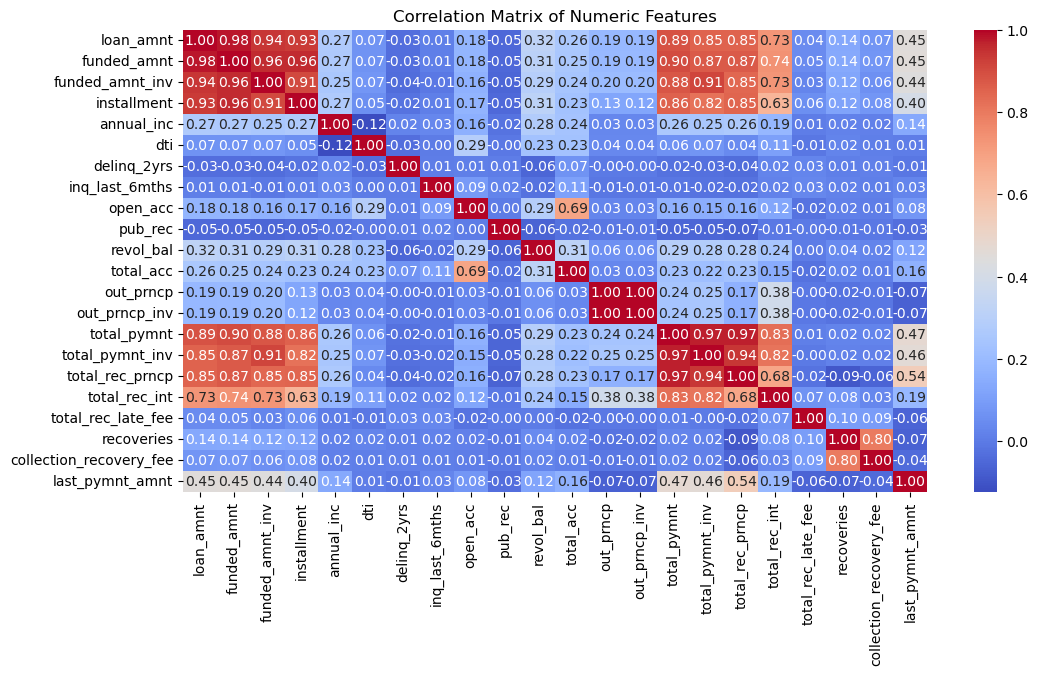


 Analysis shows that the loan amount is positively correlated with installment, funded amount, and total payment, and negatively correlated with interest rate and annual income.


In [54]:
# Analysis of Correlation Matrix of Numeric Features
"""
This script visualizes the analysis of correlation matrix of numeric features.
Steps:
1. Create a correlation matrix of numeric features.
2. Create a heatmap of the correlation matrix.
3. Display the heatmap with a title.

"""
# Select numeric columns
numeric_cols = df_loan.select_dtypes(include=[np.number])

# Create correlation matrix
corr = numeric_cols.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr, cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlation Matrix of Numeric Features')
plt.show()

# Summary Statistics of Correlation Matrix of Numeric Features

print("\n Analysis shows that the loan amount is positively correlated with installment, funded amount, and total payment, and negatively correlated with interest rate and annual income.")


### Conclusion

# Driving Factors :

The analysis of the loan dataset reveals seven key driving variables:

1. Home Ownership: The majority of loan applicants have home ownership of 'RENT' (47.58%). Most of the defaulters(Charged Off) belong to the Rent home ownership category.
2. Loan Purpose: Most of the defaulters(Charged Off) belong to the Debt consolidation loan purpose category.
3. Loan Term: The majority of loans have a term of 36 months (73.3%). Most of the defaulters(Charged Off) belong to the 36 month loan term.
4. Loan Amount: The loan amounts range from $500 to $35,000 with a mean of $11,219 and a median of $10,000. The mean and max loan amounts are highest for 'Charged Off'(Defaulter) loans.
5. Work Experience: The majority of loan applicants have work experience of 10+ years (22.36%).
6. Loan Grade: The majority of loans are assigned a grade of 'B' (29.2%). Most of the defaulters(Charged Off) belong to the 'C' loan grade category.
7. Annual Income: The loan amount is positively correlated with installment, funded amount, and total payment, and negatively correlated with interest rate and annual income.
